In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.colors import ListedColormap
import random

plt.rcParams['figure.figsize'] = (10, 8)
plt.rcParams['figure.dpi'] = 100


### Schelling Segregation Model Implementation


In [2]:
def initialize_grid(size=50, occupancy_rate=0.9):

    total_cells = size * size
    occupied_cells = int(total_cells * occupancy_rate)
    
    grid = np.zeros((size, size), dtype=int)
    
    positions = np.random.choice(total_cells, occupied_cells, replace=False)
    
    num_x = occupied_cells // 2
    num_o = occupied_cells - num_x
    
    x_positions = positions[:num_x]
    for pos in x_positions:
        row = pos // size
        col = pos % size
        grid[row, col] = 1
    
    o_positions = positions[num_x:]
    for pos in o_positions:
        row = pos // size
        col = pos % size
        grid[row, col] = 2
    
    return grid

In [3]:
def get_neighbors(grid, row, col):
    size = grid.shape[0]
    neighbors = []
    
    for dr in [-1, 0, 1]:
        for dc in [-1, 0, 1]:
            if dr == 0 and dc == 0:
                continue
            nr = row + dr
            nc = col + dc
            if 0 <= nr < size and 0 <= nc < size:
                neighbors.append(grid[nr, nc])
    
    return neighbors


In [4]:
def is_satisfied(grid, row, col, R):
    agent_type = grid[row, col]
    
    if agent_type == 0:
        return True
    
    neighbors = get_neighbors(grid, row, col)
    
    non_empty_neighbors = [n for n in neighbors if n != 0]
    
    if len(non_empty_neighbors) == 0:
        return True  # No neighbors, so satisfied
    
    same_type_count = sum(1 for n in non_empty_neighbors if n == agent_type)
    
    same_type_ratio = same_type_count / len(non_empty_neighbors)
    
    return same_type_ratio >= R


In [5]:
def find_dissatisfied_agents(grid, R):
    dissatisfied = []
    size = grid.shape[0]
    
    for row in range(size):
        for col in range(size):
            if grid[row, col] != 0:
                if not is_satisfied(grid, row, col, R):
                    dissatisfied.append((row, col))
    
    return dissatisfied


In [6]:
def find_empty_cells(grid):
    empty = []
    size = grid.shape[0]
    
    for row in range(size):
        for col in range(size):
            if grid[row, col] == 0:
                empty.append((row, col))
    
    return empty


In [7]:
def move_agents(grid, dissatisfied, empty_cells):
    new_grid = grid.copy()
    
    dissatisfied_shuffled = dissatisfied.copy()
    empty_shuffled = empty_cells.copy()
    random.shuffle(dissatisfied_shuffled)
    random.shuffle(empty_shuffled)
    
    for i, (old_row, old_col) in enumerate(dissatisfied_shuffled):
        if i < len(empty_shuffled):
            new_row, new_col = empty_shuffled[i]
            new_grid[new_row, new_col] = grid[old_row, old_col]
            new_grid[old_row, old_col] = 0
    
    return new_grid


In [8]:
def simulate_schelling(size=50, R=0.5, max_iterations=100, occupancy_rate=0.9):
    grid = initialize_grid(size, occupancy_rate)
    history = [grid.copy()]
    dissatisfied_counts = []
    
    for iteration in range(max_iterations):
        dissatisfied = find_dissatisfied_agents(grid, R)
        num_dissatisfied = len(dissatisfied)
        dissatisfied_counts.append(num_dissatisfied)
        
        # If no one is dissatisfied, we've reached equilibrium
        if num_dissatisfied == 0:
            print(f"Equilibrium reached at iteration {iteration} for R={R}")
            break
        
        empty_cells = find_empty_cells(grid)
        empty_cells.extend(dissatisfied)
        grid = move_agents(grid, dissatisfied, empty_cells)        
        history.append(grid.copy())
    
    return history, dissatisfied_counts


### Step 1: Initialize and visualize the initial random map


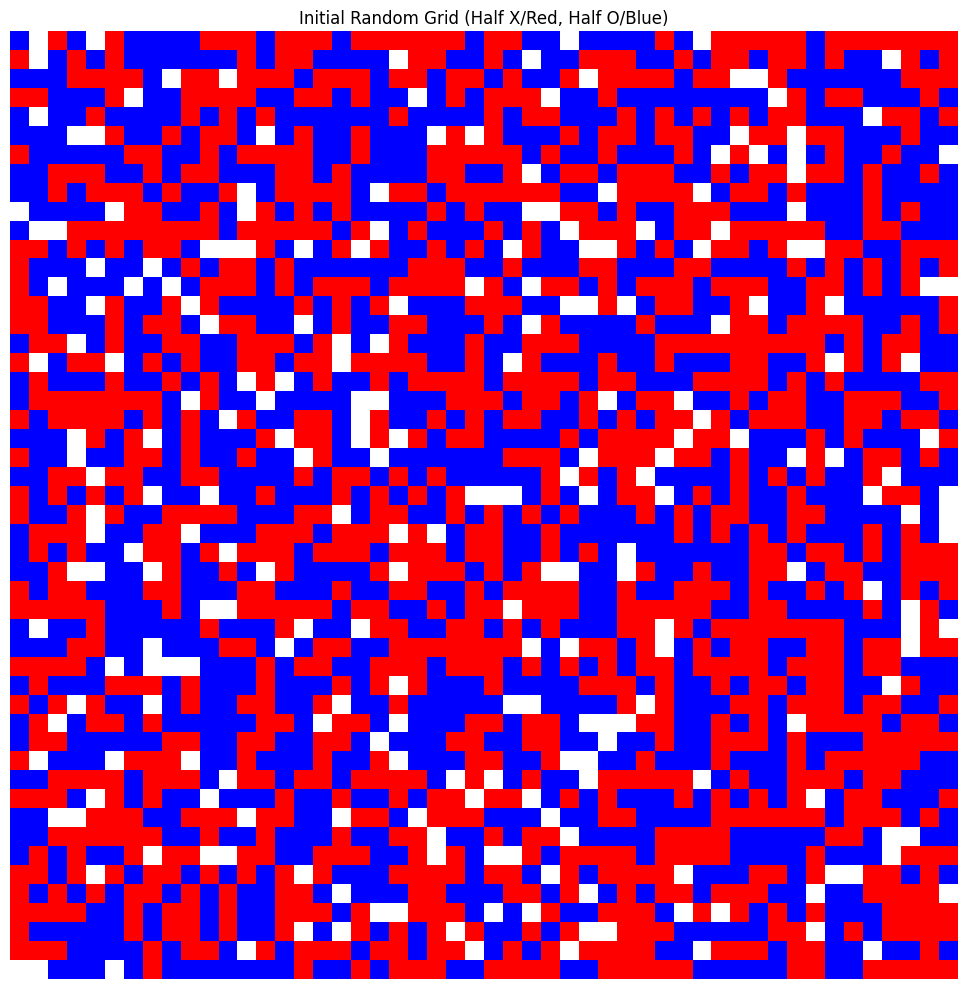

Grid size: (50, 50)
X agents (red): 1125
O agents (blue): 1125
Empty cells (white): 250


In [9]:
grid = initialize_grid(size=50, occupancy_rate=0.9)

colors = ['white', 'red', 'blue']
cmap = ListedColormap(colors)

plt.figure(figsize=(10, 10))
plt.imshow(grid, cmap=cmap, vmin=0, vmax=2)
plt.title('Initial Random Grid (Half X/Red, Half O/Blue)')
plt.axis('off')
plt.tight_layout()
plt.show()

print(f"Grid size: {grid.shape}")
print(f"X agents (red): {np.sum(grid == 1)}")
print(f"O agents (blue): {np.sum(grid == 2)}")
print(f"Empty cells (white): {np.sum(grid == 0)}")


### Step 2: Run simulations for all 9 R values and create GIFs


In [10]:
R_values = [0, 1/8, 1/4, 3/8, 1/2, 5/8, 3/4, 7/8, 1]

all_histories = {}
all_dissatisfied_counts = {}

colors = ['white', 'red', 'blue']
cmap = ListedColormap(colors)

for R in R_values:
    history, dissatisfied_counts = simulate_schelling(size=50, R=R, max_iterations=200, occupancy_rate=0.9)
    all_histories[R] = history
    all_dissatisfied_counts[R] = dissatisfied_counts

Equilibrium reached at iteration 0 for R=0
Equilibrium reached at iteration 2 for R=0.125
Equilibrium reached at iteration 7 for R=0.25
Equilibrium reached at iteration 17 for R=0.375
Equilibrium reached at iteration 13 for R=0.5
Equilibrium reached at iteration 23 for R=0.625
Equilibrium reached at iteration 51 for R=0.75
Equilibrium reached at iteration 118 for R=0.875
Equilibrium reached at iteration 144 for R=1


In [11]:
R_labels = {
    0: '0',
    1/8: '0_125',
    1/4: '0_25',
    3/8: '0_375',
    1/2: '0_5',
    5/8: '0_625',
    3/4: '0_75',
    7/8: '0_875',
    1: '1'
}

for R in R_values:
    history = all_histories[R]
    
    max_frames = 100
    if len(history) > max_frames:
        indices = np.linspace(0, len(history)-1, max_frames, dtype=int)
        history_sampled = [history[i] for i in indices]
    else:
        history_sampled = history
    
    fig, ax = plt.subplots(figsize=(10, 10))
    
    im = ax.imshow(history_sampled[0], cmap=cmap, vmin=0, vmax=2)
    ax.set_title(f'Schelling Segregation Model - R = {R:.3f} - Iteration 0', fontsize=14)
    ax.axis('off')
    
    def animate(frame):
        ax.clear()
        im = ax.imshow(history_sampled[frame], cmap=cmap, vmin=0, vmax=2)
        ax.set_title(f'Schelling Segregation Model - R = {R:.3f} - Iteration {frame}', fontsize=14)
        ax.axis('off')
        return [im]
    
    anim = FuncAnimation(fig, animate, frames=len(history_sampled), interval=100, blit=True, repeat=True)
    
    filename = f'schelling_R_{R_labels[R]}.gif'
    anim.save(filename, writer='pillow', fps=10)
    plt.close(fig)

### Step 3: Plot number of dissatisfied households vs time for all R values


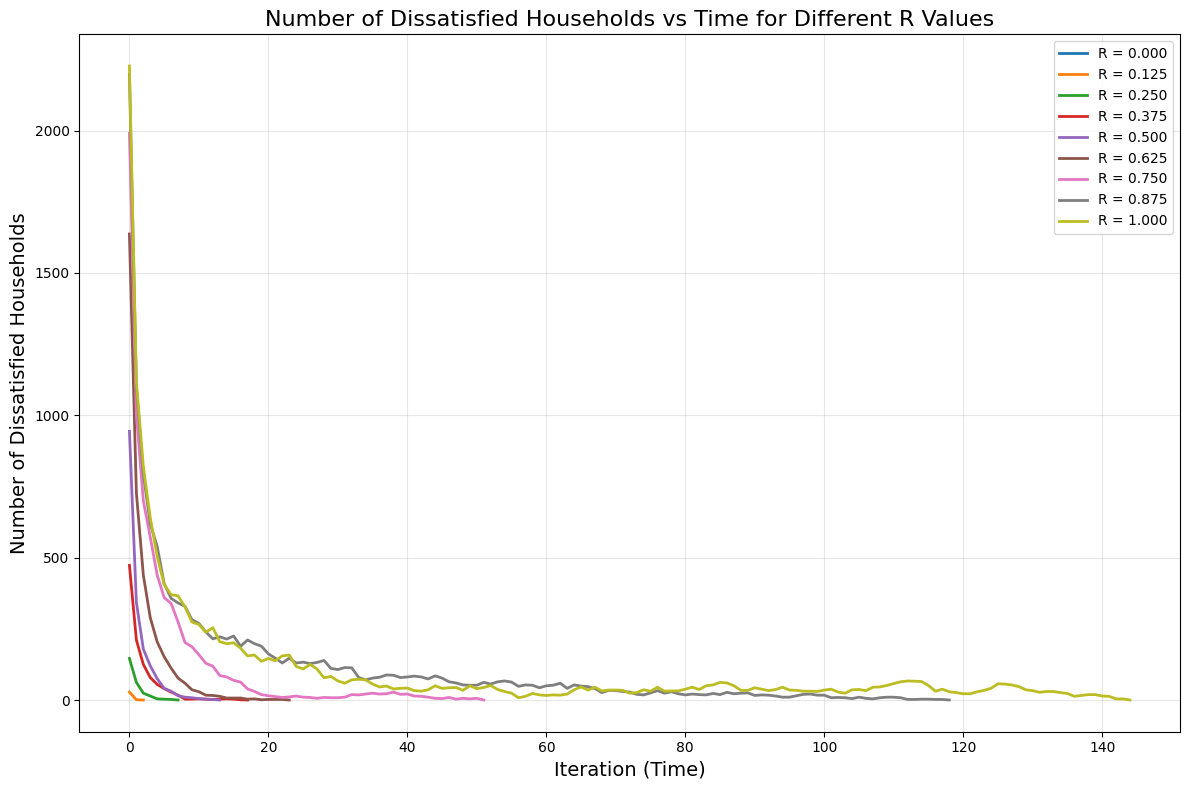

In [12]:
plt.figure(figsize=(12, 8))

for R in R_values:
    dissatisfied_counts = all_dissatisfied_counts[R]
    iterations = range(len(dissatisfied_counts))
    plt.plot(iterations, dissatisfied_counts, label=f'R = {R:.3f}', linewidth=2)

plt.xlabel('Iteration (Time)', fontsize=14)
plt.ylabel('Number of Dissatisfied Households', fontsize=14)
plt.title('Number of Dissatisfied Households vs Time for Different R Values', fontsize=16)
plt.legend(loc='best', fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()
